## Predicting Heart Disease

There are multiple risk factors that contribute for the cardio vascular disease(CVD). The goal of this project is to use a dataset that contains relevent personal and medical information collcted from patients to analyze and train a model which is to accurately predict the likelihood of a new patient having a heart disease

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display # To display the df as a table 
heart_df=pd.read_csv('heart_disease_prediction.csv')
display(heart_df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [35]:
# Target varaible in the dataset is 'HeartDisease'
# Feature dataset includes rest of the columns except target varaible.
# Calculating the number of features and observations in the dataset
feature_data=heart_df.drop('HeartDisease',axis=1)
num_features=feature_data.shape[1]
print(f'Number of features of the dataset :{num_features}')
num_observations=heart_df.shape[0]
print('Number of observations of the dataset:{}'.format(num_observations))

Number of features of the dataset :11
Number of observations of the dataset:918


In [36]:
# Types of each variable
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [37]:
# Displaying the descriptive statistics of the dataframe 
heart_df.describe ()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- In the descriptive statistics, only the columns with numerical dtypes are considered.
- Although `HeartDisease` and `FastingBS` have types as **int64**, those values are only binary values of either 0 or 1.So,that these two varaibales would be considered as categorical variables.
- The avaerage age of a patinet is around 54 years.
- `RestingBP`,`Cholesterol`,`FastingBP` have minimum value of zero which is very low ans unlike to happen.
- According to [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean) **Serum Cholesterol** is:
 >is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level.
- Since`Cholesterol` value contains serum Cholesterl , it is highly unlikely to have zero value for the cholesterol meassure.
- The **median** of the `Cholesterol` is around **25 mm/dl** lesser than the **mean/ middle quantile** cholesterol value which is 223 mm/ld. This suggests a left skewed distribution with possible outliers causinig the skewness.

In [38]:
# Finding null values in the dataframe 
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- `heart_df` don't have any null values which satisfies one of the criteria of the dataset prior using it for training the ML model.

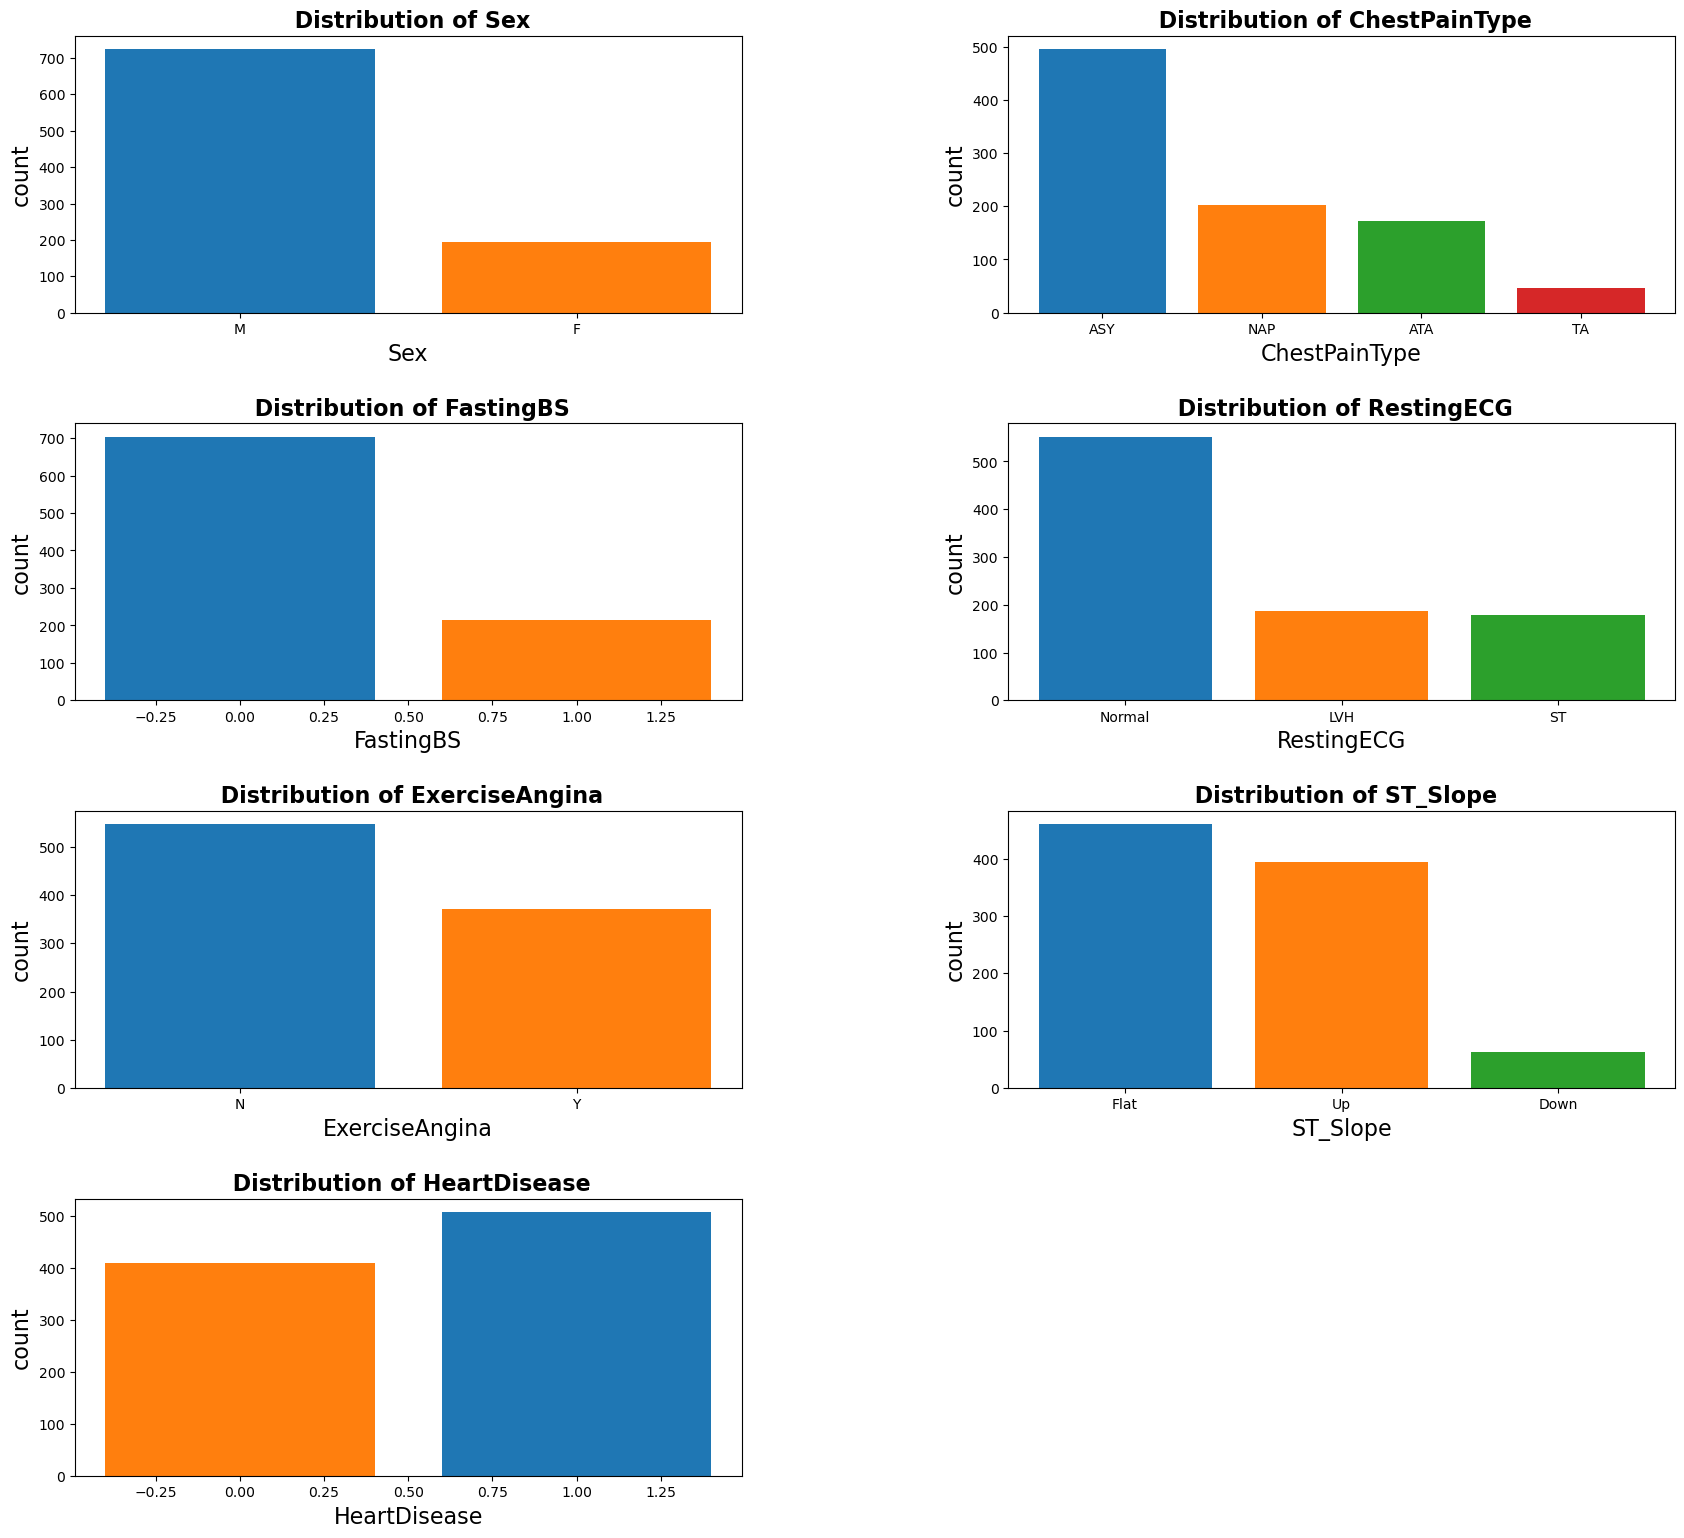

In [39]:
# Create a bar chart for each categorical variable in the df 

import matplotlib.pyplot as plt

categorical_cols=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

fig=plt.figure(figsize=(20,18))
for i, col in enumerate(categorical_cols):
    ax=plt.subplot(4,2,i+1)
    plt.bar(heart_df[col].value_counts().index,height=heart_df[col].value_counts().values,
           color=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728'],align='center')
    plt.title(f' Distribution of {col}',weight='bold',fontsize=16)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('count',fontsize=16)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)  
plt.show()

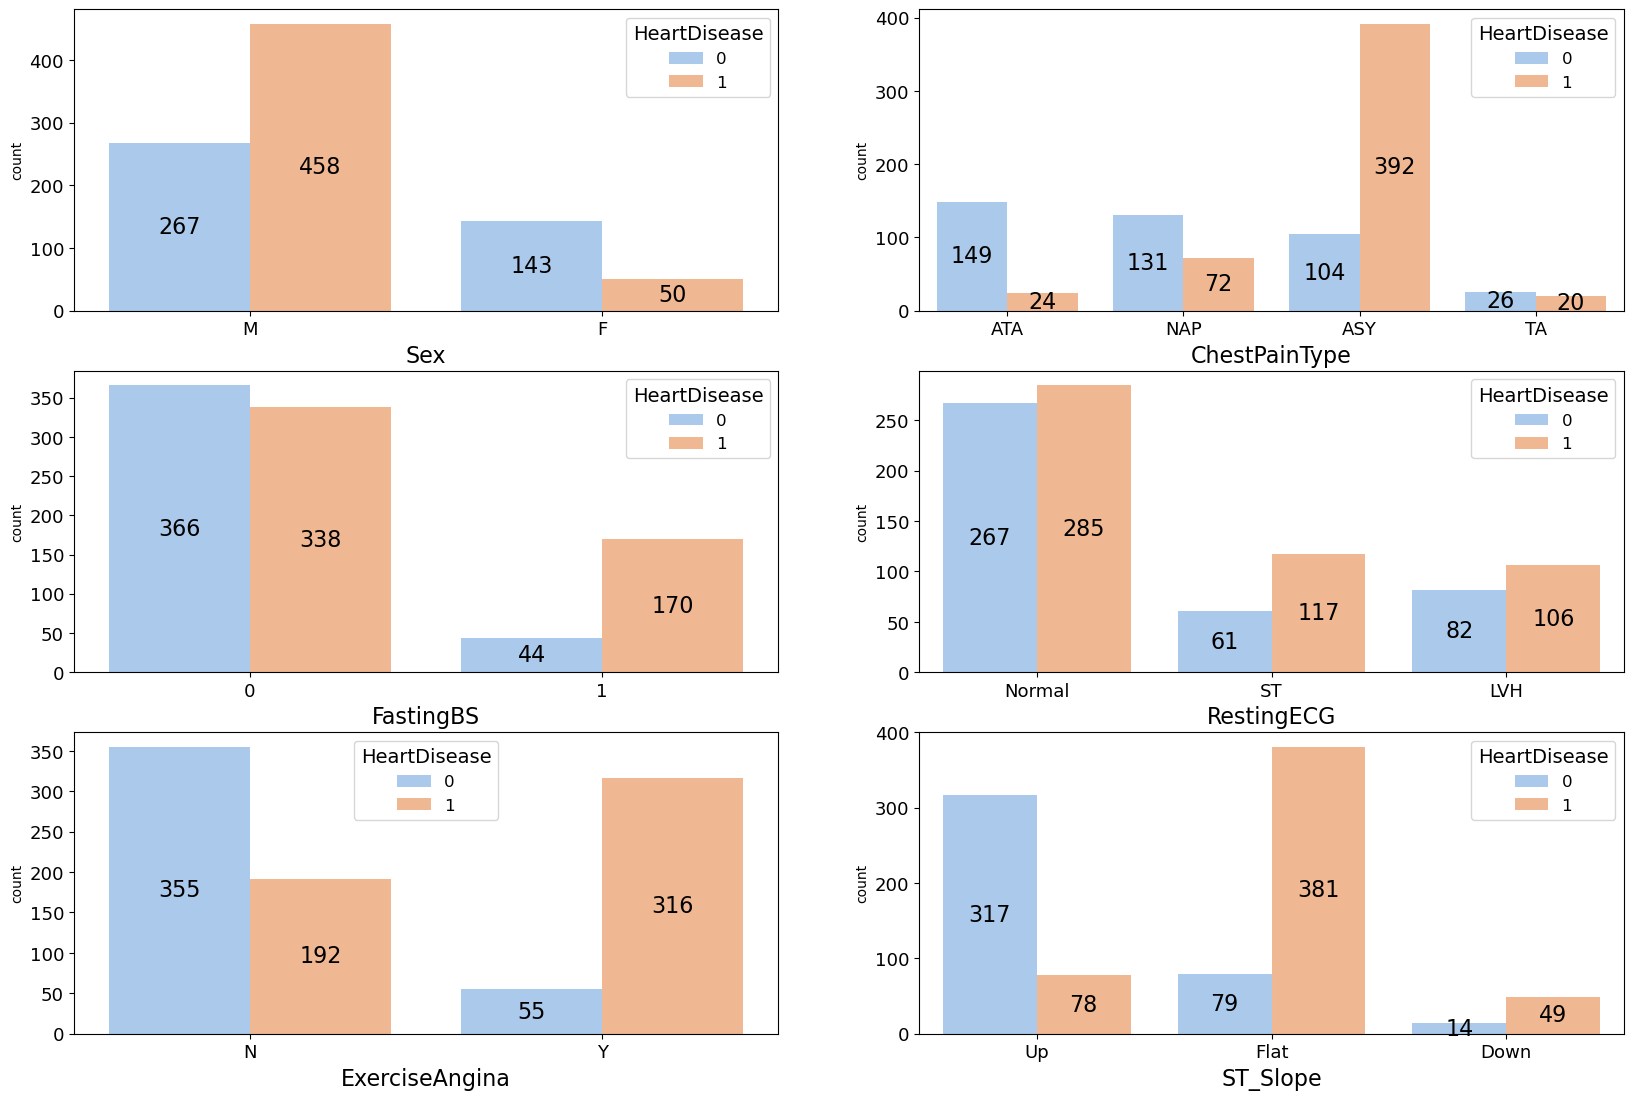

In [40]:
# Create bar charts for each categorical varaible grouped by 'HeartDisease'
fig = plt.figure(figsize=(20,18))

for i, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(x=heart_df[col], hue=heart_df["HeartDisease"], ax=ax,palette='pastel')
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center",size=16)
        ax.tick_params(labelsize=13)
        ax.set_xlabel(col,size=16)
        ax.legend(title='HeartDisease',title_fontsize=14,fontsize=12)        
plt.show()      

- There is a higher percentage of `Male` patients in corresponds to `Female` patients,and it makes the dataset highly skewed towards the `Male` patients, and potentialy adds a bias to the dataset.
- Although the distribution of `Sex` was biased towards `Male` patients, the target varaiable`HeartDisease` is somewhat fairly distributed among each gender.
- Among `Male` patients, the population disagnosed with a heart disease was nearly twice the population of patinets without a heart disease.
- Among `Female` patinets, a patient getting a heart disease was nearly one third of the patients  without a heart disease.
- The most common `ChestPainType` found among all patients was **ASY**(Asymptomatic: Without showing any symptoms).
- Although `RestingECG` of most patinets were **Normal**, it had a nearly equal chance of being or not being diagnosed with a heart disease.
- Most Patinets with a **flat** `ST-Slope` had a heart disease.
- Among the patinets who had a blood sugar level **above 120 mg/dl**, most were diagnosed with a heart disease.
- Majority of patients had blood sugar level **below 120 mg/dl**, but they had a similar probability of getting diagnosed with a cardiac disease.


### Data Cleaning 

As the dataset had some columns with **zero** value for its mininium value, which is theoretically unlikely to happen, 
>It needs furher evaluation of the observations for each of those columns in order to determine if those rows should be eliminated from the dataset or if the **zero** values of those obesrvations should be imputed with median/mode meassures.

In [41]:
num_BP=heart_df[heart_df['RestingBP']==0].shape[0]
print(f'Number of rows with 0 value for RestingBP: {num_BP}')

num_chol=heart_df[heart_df['Cholesterol']==0].shape[0]
print(f'Number of rows with 0 value for Cholesterol: {num_chol}')


Number of rows with 0 value for RestingBP: 1
Number of rows with 0 value for Cholesterol: 172


Thse observations are replaced with the median of the each column grouped by `Age`,`Sex` and`RestingECG`

In [42]:
# Identifying which row has the minimum RestingBP as zero
index_num=heart_df[heart_df['RestingBP']==0].index
display(heart_df.iloc[449:450])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


- The observation with zero for `RestingBP` is a **Male** patient with *Age* of **55** having a **Normal** *RestingECG*. 

In [43]:
# Imputing the zero value of RestingBP
# Grouping the df to create a GroupBy object
grouped=heart_df.groupby(['Age','Sex','RestingECG']).get_group((55,'M','Normal'))
#Apply median() function on grouped object 
median_BP=grouped['RestingBP'].median()
display(median_BP)

140.0

- The above caluclated `RestingBP` of **140 mm Hg** is use for imputation. 

In [44]:
# Replacing the 0 with 140 for the RestingBP
heart_df['RestingBP']=heart_df['RestingBP'].mask(heart_df['RestingBP']==0,140)
display(heart_df.iloc[449:450]) # Check if the value is replaced 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,140,0,0,Normal,155,N,1.5,Flat,1


In [45]:
heart_df['RestingBP'].value_counts()


120    132
130    118
140    108
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 66, dtype: int64

In [46]:
# Identifying which rows has minimum Cholesterol as zero
heart_df[heart_df['Cholesterol']==0].index
zero_chol=heart_df[heart_df['Cholesterol']==0]
print(zero_chol['Age'].mode())
print(zero_chol['Sex'].mode())
print(zero_chol['RestingECG'].mode())

0    61
Name: Age, dtype: int64
0    M
Name: Sex, dtype: object
0    Normal
Name: RestingECG, dtype: object


- Most common variable values for the observations with zero for `Cholesterol` would be a **Male** patient with *Age* of **61** having a **Normal** *RestingECG*.

In [47]:
# Imputing the zero values of Cholesterol
# Grouping the df to create a GroupBy object
grouped_2=heart_df.groupby(['Age','Sex','RestingECG']).get_group((61,'M','Normal'))

#Apply median() function on grouped object 
median_chol=grouped['Cholesterol'].median()
display(median_chol)

256.0

- The above calculated ` Cholesterol` of **256 mm/dl** is use for imputation.

In [48]:
# Replacing 0 with 256 for Cholesterol
heart_df['Cholesterol']=heart_df['Cholesterol'].mask(heart_df['Cholesterol']==0,256)

In [49]:
# Check if values are correctly replaced
boolean=heart_df['Cholesterol']==0
boolean.value_counts()

False    918
Name: Cholesterol, dtype: int64

- boolean resulted a **False** count of **918** as output, that indicates none of the rows have value of zero for `Cholesterol` and suggests all zero values have been succesfully replaced.

## Feature Selection

In [51]:
# Converting categorical varaibles with object dtype to dummy variables
heart_df=pd.get_dummies(heart_df,drop_first=True)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [52]:
# Calculating the Pearson's correlation matrix and calculating top five features
corr=heart_df.corr().abs()
corr['HeartDisease'].sort_values(ascending=False)[1:6].index

Index(['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak',
       'ChestPainType_ATA'],
      dtype='object')

<AxesSubplot:>

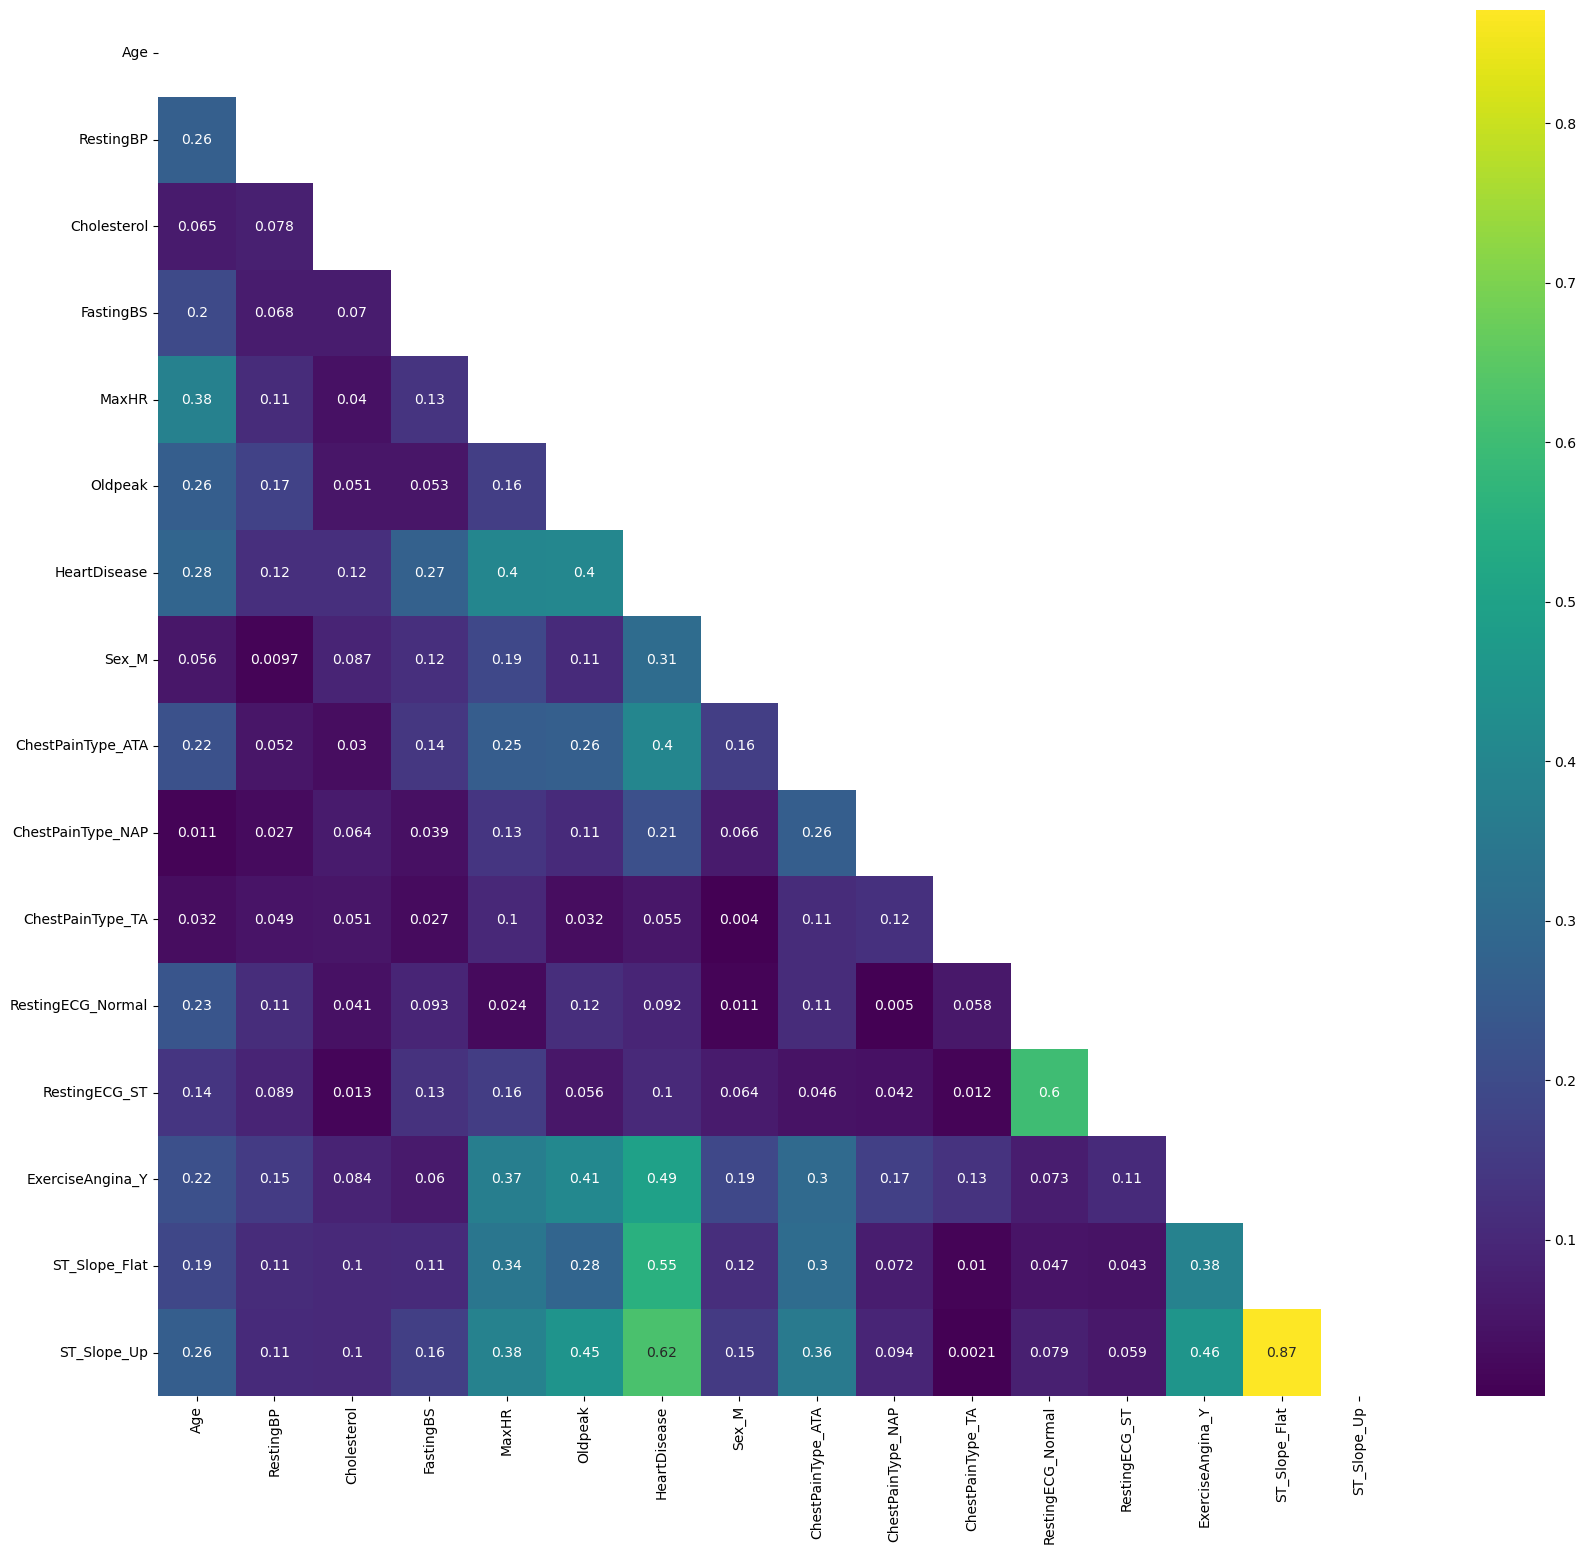

In [53]:
# Exploring the correlation of features using a heatmap
fig=plt.figure(figsize=(20,18))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,cmap='viridis',mask=mask)

By looking at the heat map, it can be determined: `ST_Slope_Up`,`ST_Slope_Flat`,`ExerciseAngina_Y`,`Oldpeak`,`ChestPainType_ATA` are the top five features with highest correlation to the target varaiable,**HeartDisease**.

- From EDA, `Age`,`Sex`,`ChestPainType`,`RestingECG`,`RestingBP`,`Cholesterol`,`FastingBS`, `ExerciseAngina` and `ST_slope` were preliminary selected as the most impactful features on the target variable's prediction. 
- After the analysis from the correlation heat map, some of the above features don't have a high correlation to `HeartDisease`.
- Although `Sex_M` was not included in the top five correlated features, it would be useful to consider it as a feature variable due to observations made in EDA.
- Final selection of variables for the feature dataset would be `ST_Slope_Up`,`ST_Slope_Flat`,`ExerciseAngina_Y`,`Oldpeak`,`ChestPainType_ATA`and `Sex_M`.

## Building a Classifier with one feature 

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

heart_clean=heart_df[['ST_Slope_Up','ST_Slope_Flat','ExerciseAngina_Y',
                      'Oldpeak','ChestPainType_ATA','Sex_M','HeartDisease']]

# Assigning feature dataset(x) and target variable(y)
X=heart_clean.drop('HeartDisease',axis=1)
y=heart_clean['HeartDisease']

# Split the dataset to training and validation datasets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=417)

feature_list=list(X)
accuracies={}
for feature in feature_list:
    knn=KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train[[feature]],y_train)
    accuracy=knn.score(X_val[[feature]],y_val)
    accuracies[feature]=round(accuracy,2)*100
print(accuracies)


{'ST_Slope_Up': 82.0, 'ST_Slope_Flat': 80.0, 'ExerciseAngina_Y': 71.0, 'Oldpeak': 71.0, 'ChestPainType_ATA': 66.0, 'Sex_M': 46.0}


- `ST-Slope_Up` feature has the highest model accuracy of **82%**.
- `ChestPainType_ATA` and `Oldpeak` has a fairly moderate accuracies.
- `Sex_M'` feature has the lowest model accuracy out of selected features, which could be potentially due to very less correlation of this varaible to the `HeartDisease`.

## Building a Classifier with multiple features

In [70]:
# Normalizing the data using the MinMaxScalar
scaler=MinMaxScaler() # Instantiate the scaler
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.fit_transform(X_val)

# Evaluating the model using the scaled data on multiple features
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled,y_train)
accuracy_2=knn.score(X_val_scaled,y_val)
print(f' The accuracy of the model trained on multiple features is {round(accuracy_2*100,2)}%')


 The accuracy of the model trained on multiple features is 82.97%


- The accuracy of the model when trained on the selected features is **81.52%** which is about 0.5 less than the highest model accuracy gained when it was trained using a one feature. 
- This model accuracy is greater than the average model accuracy gained when the model was trained using a single feature.

## Hyperparameter Tunning 

In [73]:
# Using the GridSearchCV to experiment and find the best parameters and hyperparameters for the model
# Split the dataset to training and validation sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=417)

# Normalizing the dataset 
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.fit_transform(X_val)

# Dictionary of hyperparameters
grid_params={'n_neighbors':range(1,6),'p':[1,2,6],'weights':['uniform','distance'],
             'metric':["minkowski", "manhattan"]}
knn=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn,param_grid=grid_params,scoring='accuracy')
knn_grid.fit(X_train_scaled,y_train)
best_score=knn_grid.best_score_
print(f'Best score obtained for the model accuracy using GridSearchCV is {round(best_score*100,2)}%')
best_params=knn_grid.best_params_
print(f'Best model parameters selected by GridSearchCV are {best_params}')

Best score obtained for the model accuracy using GridSearchCV is 83.95%
Best model parameters selected by GridSearchCV are {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


- The accuracy of the model gained from the **GridSearchCV** is the highest value which is **83.95%**.

## Evaluation of the model on the Testset

In [81]:
# Normalizing the test set
X_test_scaled=scaler.transform(X_test) # Only the transform function is enough because data has already been fitto the model

# Using GridSearchCV best_estimator_ to predict the prediction and find accuracy

prediction=knn_grid.best_estimator_.predict(X_test_scaled)
model_accuracy=knn_grid.best_estimator_.score(X_test_scaled,y_test)

print(f'The accuracy of the model is {round(model_accuracy*100,2)}%')



The accuracy of the model is 84.06%


## Conclusion
 - The model accuracy is fairly good as it produce accurate prediction 84% of the time. But its not an excellent accuracy for the model to be used in practical healthcare setting due to 16% chance of predicting false negative or false positive results.
 - As preliminary response to a patients' cardiac health test, this model can be used to gain a fast prediction for the patient's probability of getting a cardiac disease,while keeping it for further investigation for thorough and most definete diagnosis of the results.
 - The model accuray could be improved by trying different combinations of hyperparameters and changing the sample size of tarining dataset reducing the overfitting of the data.